In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from datetime import *
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import numpy as np

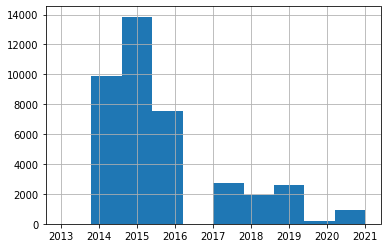

In [2]:
ml = pd.read_csv("Water_ML.csv")
ml["Measurement Year"].hist()

In [3]:
row_data = pd.read_csv("Water.csv")
locations = pd.read_csv("Locations.csv")
locations.info()
#locations['Sensor Name'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sensor Name  9 non-null      object 
 1   Sensor Type  9 non-null      object 
 2   Latitude     9 non-null      float64
 3   Longitude    9 non-null      float64
 4   Location     9 non-null      object 
dtypes: float64(2), object(3)
memory usage: 488.0+ bytes


In [4]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40707 entries, 0 to 40706
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Beach Name                   40707 non-null  object 
 1   Measurement Timestamp        40707 non-null  object 
 2   Water Temperature            40707 non-null  float64
 3   Turbidity                    40707 non-null  float64
 4   Transducer Depth             10034 non-null  float64
 5   Wave Height                  40480 non-null  float64
 6   Wave Period                  40480 non-null  float64
 7   Battery Life                 40707 non-null  float64
 8   Measurement Timestamp Label  40707 non-null  object 
 9   Measurement ID               40707 non-null  object 
dtypes: float64(6), object(4)
memory usage: 3.1+ MB


In [5]:
#----- Measurement Timestamp --------------------

temp = row_data["Measurement Timestamp Label"].str.split(" ", n = 1, expand = True)

#spliting the date to day, month and year
temp[0] = pd.to_datetime(temp[0]).dt.strftime('%d/%m/%Y')
row_data[["Measurement Day", "Measurement Month", "Measurement Year"]] = temp[0].str.split("/", expand=True)
row_data["Measurement Hour"] = temp[1]
row_data["Measurement Hour"] = pd.to_datetime(row_data["Measurement Hour"]).dt.strftime('%H:%M:%S')
row_data["Measurement Hour"] = row_data["Measurement Hour"].str.split(":" , expand=True)[0]
row_data["Measurement Date"] = temp[0]

row_data.pop("Measurement Timestamp Label")
row_data.pop("Measurement ID")

#row_data["M_date"] = row_data["Measurement Day"] + "/" + row_data["Measurement Month"] + "/" + row_data["Measurement Year"]

row_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40707 entries, 0 to 40706
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Beach Name             40707 non-null  object 
 1   Measurement Timestamp  40707 non-null  object 
 2   Water Temperature      40707 non-null  float64
 3   Turbidity              40707 non-null  float64
 4   Transducer Depth       10034 non-null  float64
 5   Wave Height            40480 non-null  float64
 6   Wave Period            40480 non-null  float64
 7   Battery Life           40707 non-null  float64
 8   Measurement Day        40707 non-null  object 
 9   Measurement Month      40707 non-null  object 
 10  Measurement Year       40707 non-null  object 
 11  Measurement Hour       40707 non-null  object 
 12  Measurement Date       40707 non-null  object 
dtypes: float64(6), object(7)
memory usage: 4.0+ MB


In [ ]:
row_data["M_date"] = row_data["Measurement Day"] + "/" + row_data["Measurement Month"] + "/" + row_data["Measurement Year"]


**Structure Investigation**

# 1.Structure Investigation

In [ ]:
pd.value_counts(row_data.dtypes)

object     8
float64    6
int64      1
dtype: int64

1.1. Structure of non-numerical features

In [ ]:
row_data.describe(exclude="number")

,Beach Name,Measurement Timestamp,Measurement Day,Measurement Month,Measurement Year,Measurement Hour,Measurement Date,M_date
count,40707,40707,40707,40707,40707,40707,40707,40707
unique,6,16586,31,7,9,24,743,743
top,Ohio Street Beach,09/08/2015 3:00,25,07,2015,15,06/07/2015,06/07/2015
freq,15131,6,1445,12314,14341,1732,144,144


1.2. Structure of numerical features

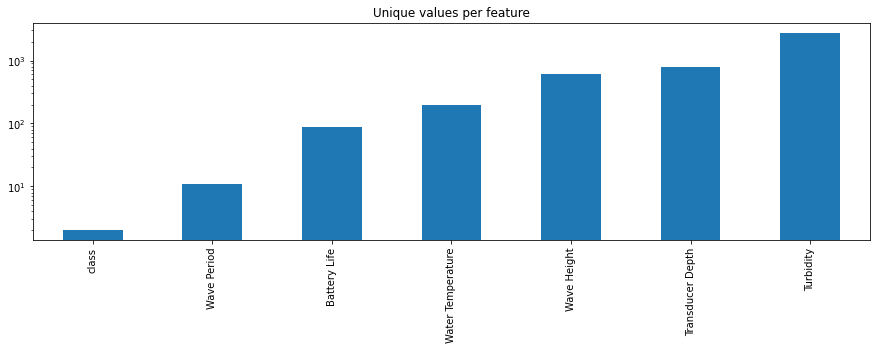

In [ ]:
unique_values = row_data.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15,4), title="Unique values per feature")

# Quality Investigation

Duplicates - we are not expecting any duplicates because the data coming from sensors

Missing Values

Text(0, 0.5, 'Sample Number')

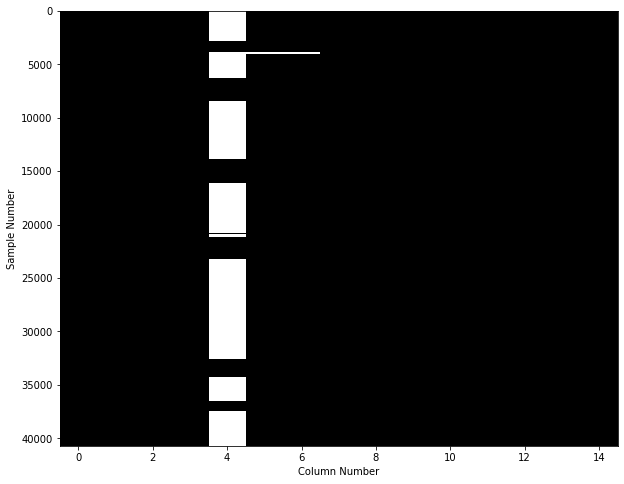

In [ ]:
plt.figure(figsize = (10,8))
plt.imshow(row_data.isna(), aspect = "auto", interpolation = "nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

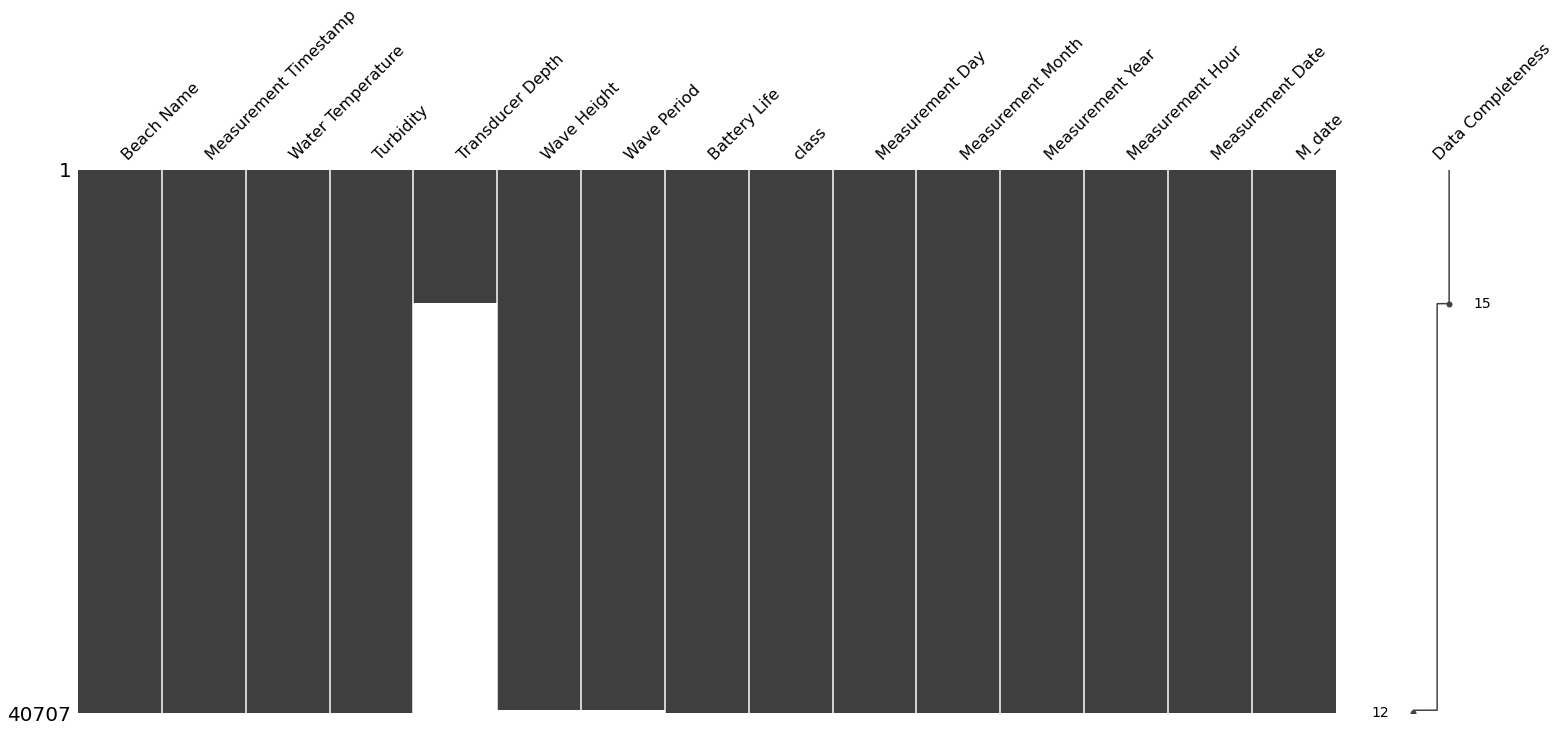

In [ ]:
msno.matrix(row_data, labels = True , sort = "descending")

from both of these plots we can see thaht the dataset has a huge hole in the Transducer depth column. 75% of the the feature values are missing. 
we decied to drop it.

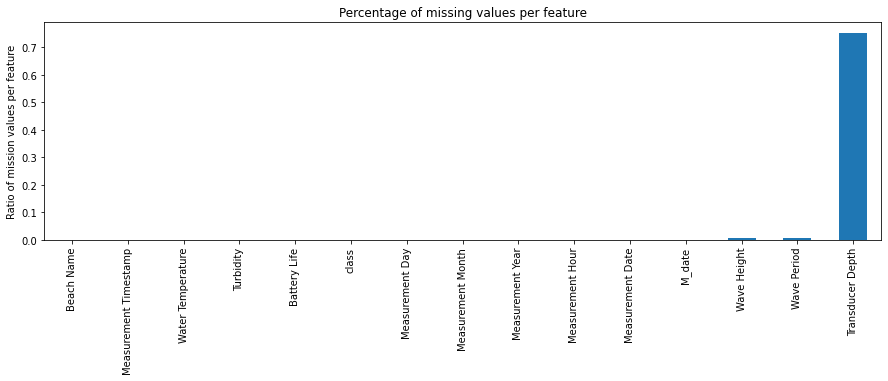

In [ ]:
row_data.isna().mean().sort_values().plot(kind = "bar", figsize=(15,4), 
                                          title = "Percentage of missing values per feature",
                                          ylabel = "Ratio of mission values per feature")

In [ ]:
row_data = row_data.dropna(axis = 0)
# row_data.pop("Transducer Depth")
# row_data.info()

In [ ]:
locations.rename(columns = {'Sensor Name':'Beach Name'}, inplace = True)

row_data = pd.merge(row_data, 
                      locations, 
                      on ='Beach Name', 
                      how ='inner')

row_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10034 entries, 0 to 10033
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Beach Name             10034 non-null  object 
 1   Measurement Timestamp  10034 non-null  object 
 2   Water Temperature      10034 non-null  float64
 3   Turbidity              10034 non-null  float64
 4   Transducer Depth       10034 non-null  float64
 5   Wave Height            10034 non-null  float64
 6   Wave Period            10034 non-null  float64
 7   Battery Life           10034 non-null  float64
 8   class                  10034 non-null  int64  
 9   Measurement Day        10034 non-null  object 
 10  Measurement Month      10034 non-null  object 
 11  Measurement Year       10034 non-null  object 
 12  Measurement Hour       10034 non-null  object 
 13  Measurement Date       10034 non-null  object 
 14  M_date                 10034 non-null  object 
 15  Se

Outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58ab78d9d0>,
      dtype=object)

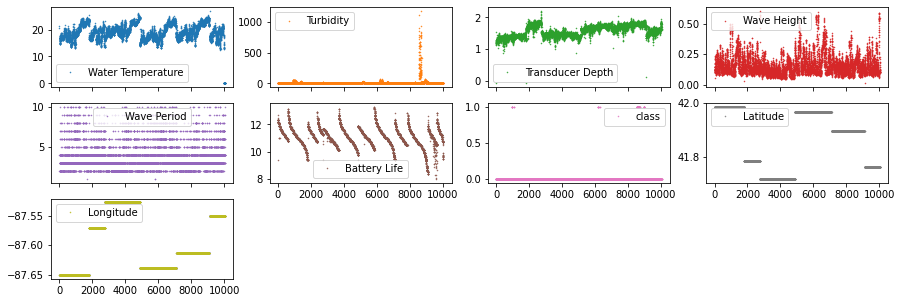

In [ ]:
row_data.plot(lw = 0, marker = ".", subplots = True, layout = (-1,4), figsize = (15,5), markersize = 1)

In [ ]:
#Q3 = row_data['Water Temperature'].quantile(0.98)
row_data = row_data[~(row_data['Battery Life'] < 8)]
row_data = row_data[~(row_data['Water Temperature'] < 5)]
row_data = row_data[~(row_data['Turbidity'] > 200)]
row_data = row_data[~((row_data['Wave Height'] < 0) | (row_data['Wave Height'] > 0.8))]
row_data = row_data[~(row_data['Wave Period'] < 0)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58ab825e90>,
      dtype=object)

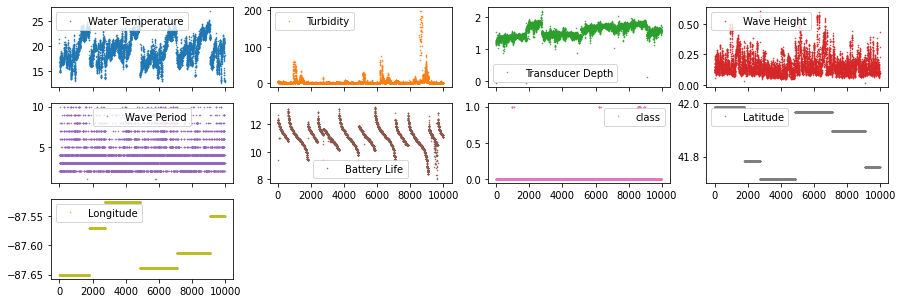

In [ ]:
row_data.plot(lw = 0, marker = ".", subplots = True, layout = (-1,4), figsize = (15,5), markersize = 1)

Non-numerical features outliers - measured by the frequency of the word/category

In [ ]:
# row_data["Measurement Day"] = row_data["Measurement Day"].astype("int") 
# row_data["Measurement Month"] = row_data["Measurement Month"].astype("int") 
# row_data["Measurement Year"] = row_data["Measurement Year"].astype("int") 
# row_data["Measurement Hour"] = row_data["Measurement Hour"].astype("int") 
# #row_data["Station Name Encoded"] = row_data["Station Name Encoded"].astype("int") 
# row_data["Measurement Hour"] = row_data["Measurement Hour"].astype("int") 
# row_data['Measurement Date'] = pd.to_datetime(row_data['Measurement Date'])
# #row_data.pop('Measurement Timestamp')
row_data.info()
# row_data.pop("Beach Name")
# row_data.pop("Sensor Type")
# row_data.pop("Location")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9896 entries, 0 to 9989
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Beach Name             9896 non-null   object 
 1   Measurement Timestamp  9896 non-null   object 
 2   Water Temperature      9896 non-null   float64
 3   Turbidity              9896 non-null   float64
 4   Transducer Depth       9896 non-null   float64
 5   Wave Height            9896 non-null   float64
 6   Wave Period            9896 non-null   float64
 7   Battery Life           9896 non-null   float64
 8   class                  9896 non-null   int64  
 9   Measurement Day        9896 non-null   object 
 10  Measurement Month      9896 non-null   object 
 11  Measurement Year       9896 non-null   object 
 12  Measurement Hour       9896 non-null   object 
 13  Measurement Date       9896 non-null   object 
 14  M_date                 9896 non-null   object 
 15  Sens

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58ab820810>,
      dtype=object)

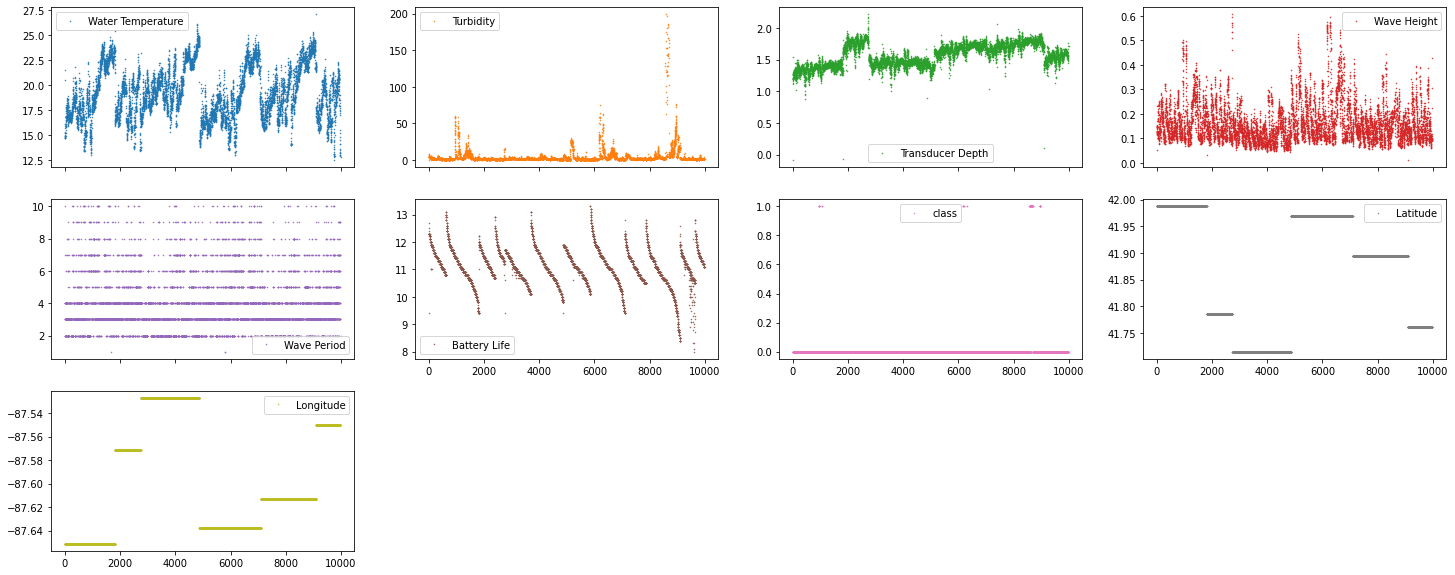

In [ ]:
row_data.plot(lw = 0, marker = ".", subplots = True, layout = (-1,4), figsize = (25,10), markersize = 1)

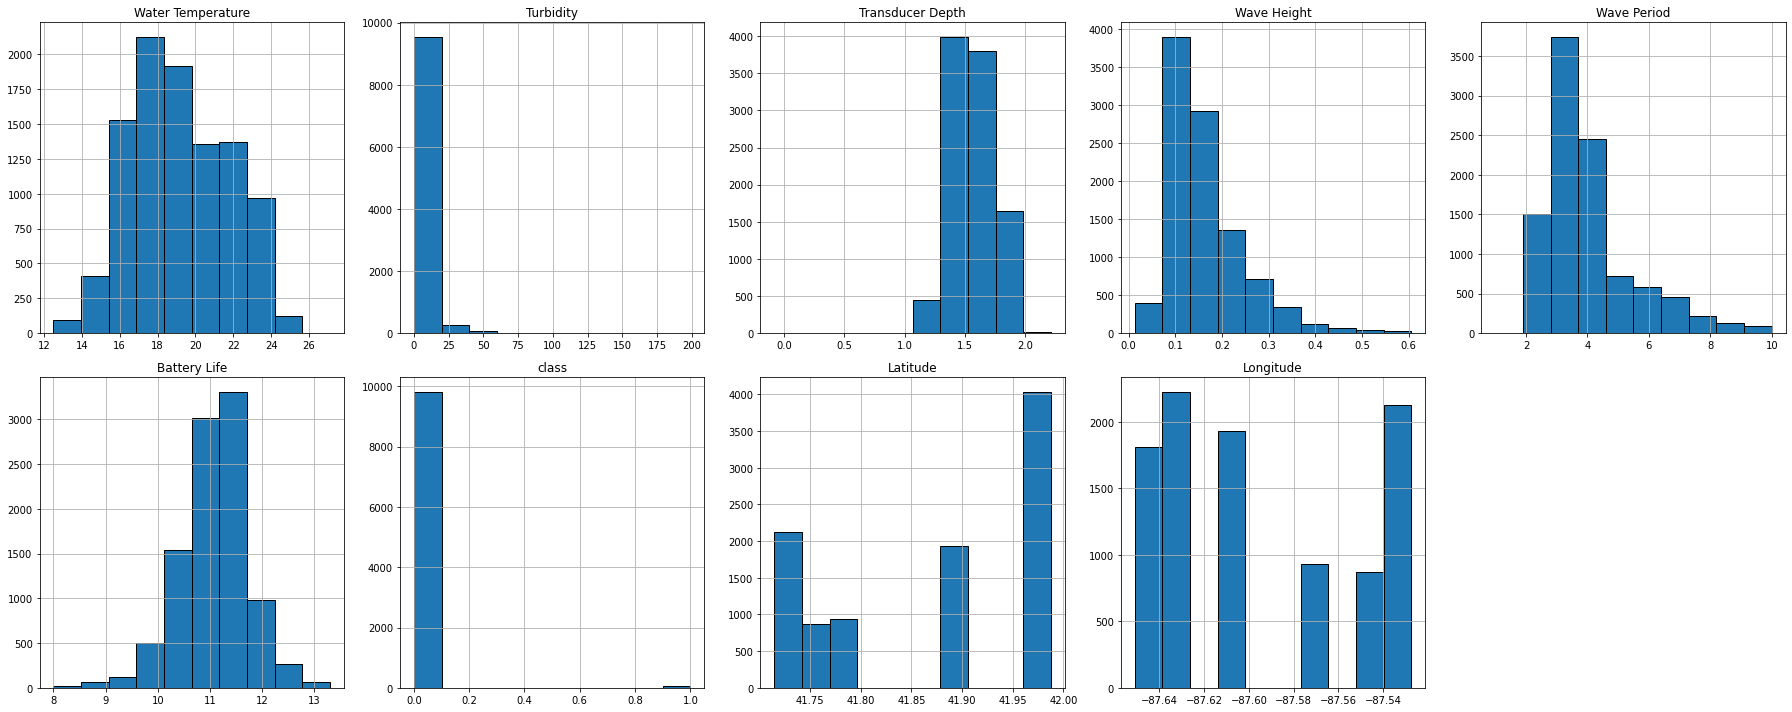

In [ ]:
row_data.hist(bins = 10, figsize = (25,10), layout=(-1,5), edgecolor = "black")
plt.tight_layout();

Sensor Type              1.000000
Measurement Year         0.999495
class                    0.992320
Measurement Month        0.381669
Wave Period              0.377728
Beach Name               0.224939
Longitude                0.224939
Latitude                 0.224939
Location                 0.224939
Battery Life             0.069018
Measurement Hour         0.042947
Measurement Day          0.038500
Water Temperature        0.017684
Measurement Date         0.014551
M_date                   0.014551
Wave Height              0.010105
Turbidity                0.007781
Transducer Depth         0.003436
Measurement Timestamp    0.000606
dtype: float64

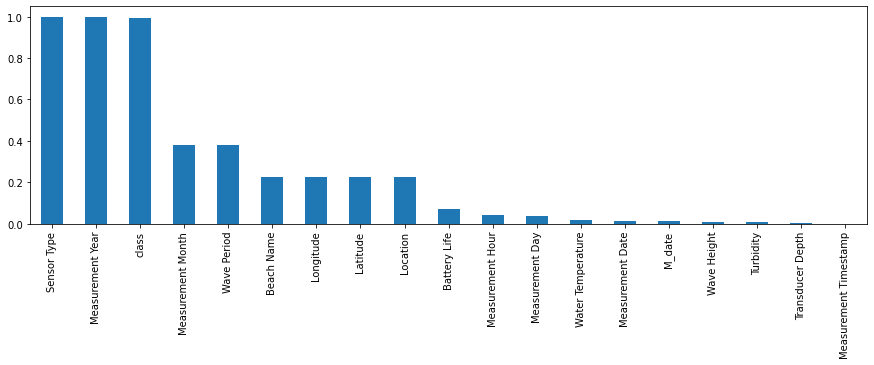

In [ ]:
most_frequent_entery = row_data.mode().iloc[0]

most_frequent_entery
df_freq = row_data.eq(most_frequent_entery.values , axis = 1)
df_freq = df_freq.mean().sort_values(ascending = False)

display(df_freq)

df_freq.plot.bar(figsize = (15,4))

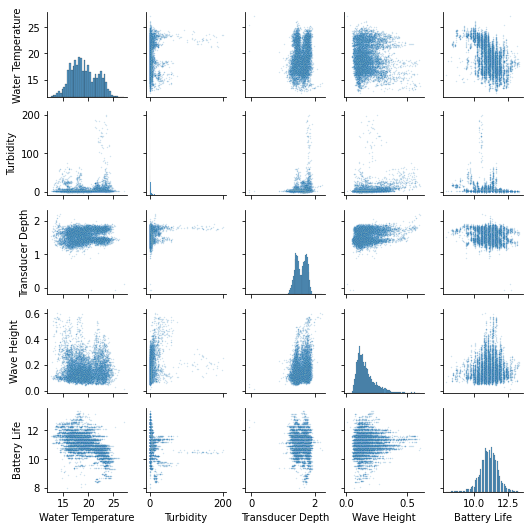

In [ ]:
cols_continous = row_data.select_dtypes(include = "number").nunique() >= 40
df_continous = row_data[cols_continous[cols_continous].index]

sns.pairplot(df_continous , height = 1.5 , plot_kws = {"s":2,"alpha":0.2})

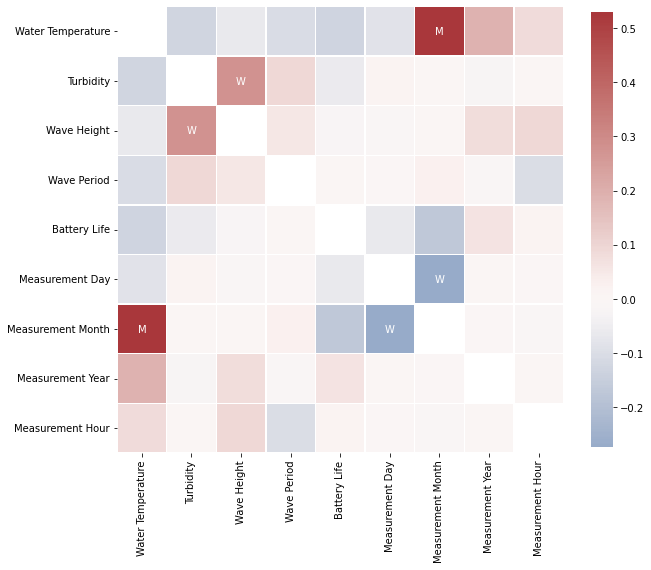

In [ ]:
df_corr = row_data.corr(method = "pearson")

labels = np.where(np.abs(df_corr) > 0.75 , "S", np.where(np.abs(df_corr) > 0.5 , "M", np.where(np.abs(df_corr) > 0.25 , "W", " ")))

plt.figure(figsize = (10,10))
sns.heatmap(df_corr, mask = np.eye(len(df_corr)), square=True , center = 0, annot=labels, fmt='', linewidths=0.5,
            cmap = "vlag", cbar_kws={"shrink":0.8})

In [ ]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39712 entries, 1 to 40706
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Beach Name         39712 non-null  object        
 1   Water Temperature  39712 non-null  float64       
 2   Turbidity          39712 non-null  float64       
 3   Wave Height        39670 non-null  float64       
 4   Wave Period        39670 non-null  float64       
 5   Battery Life       39712 non-null  float64       
 6   Measurement Day    39712 non-null  int64         
 7   Measurement Month  39712 non-null  int64         
 8   Measurement Year   39712 non-null  int64         
 9   Measurement Hour   39712 non-null  int64         
 10  Measurement Date   39712 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 3.6+ MB


In [6]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39670 entries, 0 to 39669
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         39670 non-null  int64  
 1   Water Temperature  39670 non-null  float64
 2   Turbidity          39670 non-null  float64
 3   Wave Height        39670 non-null  float64
 4   Wave Period        39670 non-null  float64
 5   Battery Life       39670 non-null  float64
 6   Measurement Day    39670 non-null  int64  
 7   Measurement Month  39670 non-null  int64  
 8   Measurement Year   39670 non-null  int64  
 9   Measurement Hour   39670 non-null  int64  
 10  Measurement Date   39670 non-null  object 
 11  Latitude           39670 non-null  float64
 12  Longitude          39670 non-null  float64
dtypes: float64(7), int64(5), object(1)
memory usage: 3.9+ MB


In [ ]:
row_data.to_csv('Water_ML.csv')